In [1]:
import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


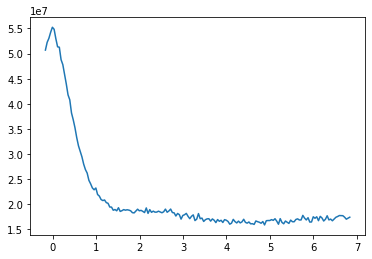

In [2]:
t, V = dl.deerload('../../data/251R1_Apo.DSC')
V = dl.correctphase(V)
t = dl.correctzerotime(V,t)
plt.plot(t,V)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 2471 seconds.
There were 3942 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.428427107057449, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4732 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.220801656024795, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1386 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6629254349194409, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1090 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6833428229009186, but should be 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.003,0.003,0.000,0.009,0.001,0.001,11.0,13.0,1.28
λ,0.678,0.007,0.661,0.689,0.002,0.002,13.0,12.0,1.24
V₀,0.997,0.005,0.990,1.008,0.001,0.001,43.0,71.0,1.08
σ,0.007,0.001,0.006,0.008,0.000,0.000,1084.0,783.0,1.00
δ,95422.676,43557.477,26667.514,176626.181,1583.620,1120.221,661.0,1330.0,1.02
lg(α),0.284,0.106,0.087,0.480,0.004,0.003,725.0,1505.0,1.02


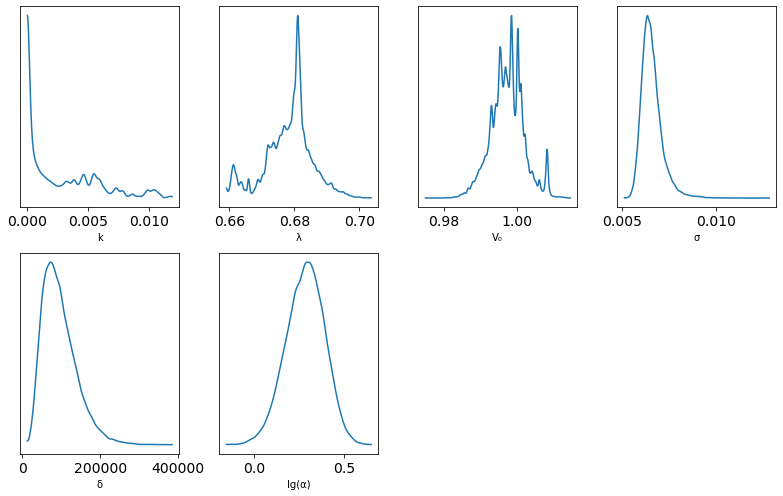

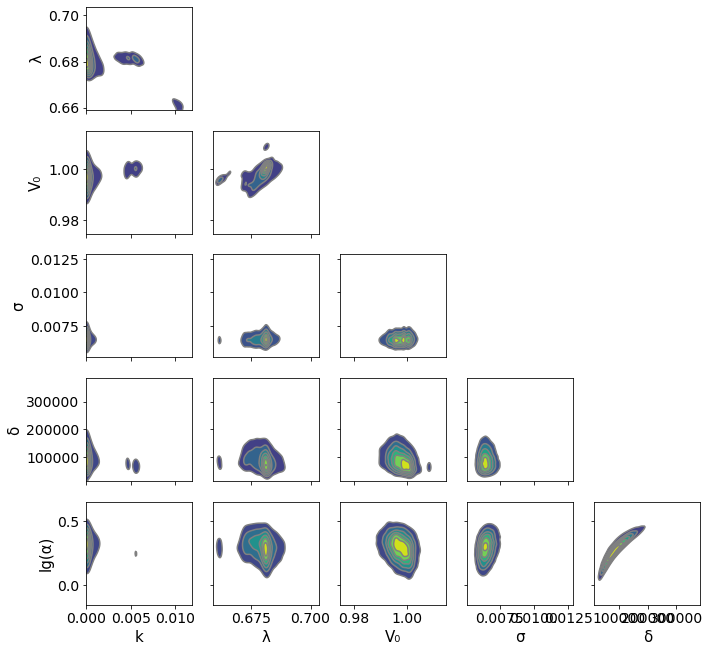

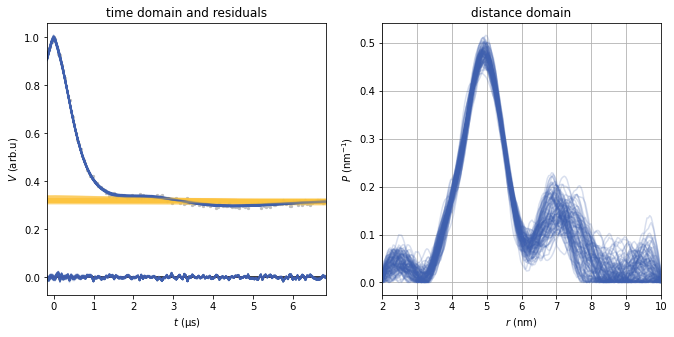

In [6]:
pars = {"method": 'regularization', "r": np.linspace(2,10,200)}

model = dive.model(t, V, pars)

MCMCparameters = {"draws": 10000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)
dive.summary(trace, model)  

In [ ]:
pars = {"method": 'regularization', "r": np.linspace(2,10,200)}

model = dive.model(t, V, pars)

MCMCparameters = {"draws": 30000,"tune": 3000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)
dive.summary(trace, model)  